<a href="https://colab.research.google.com/github/Zoro114/Dog_cat_classification/blob/main/dog_cat_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd

In [2]:
!wget "https://cainvas-static.s3.amazonaws.com/media/user_data/tanmay/dogvcat.zip"
!unzip -qo dogvcat.zip

--2022-09-06 13:10:58--  https://cainvas-static.s3.amazonaws.com/media/user_data/tanmay/dogvcat.zip
Resolving cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)... 52.219.158.63
Connecting to cainvas-static.s3.amazonaws.com (cainvas-static.s3.amazonaws.com)|52.219.158.63|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60547127 (58M) [application/zip]
Saving to: ‘dogvcat.zip’

dogvcat.zip         100%[===================>]  57.74M  12.2MB/s    in 6.5s    

2022-09-06 13:11:05 (8.89 MB/s) - ‘dogvcat.zip’ saved [60547127/60547127]



In [33]:
train_dir="/content/datset/training"
train_datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255,validation_split=0.2)
test_datagen=keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_data=train_datagen.flow_from_directory(train_dir,target_size=(32,32),batch_size=20,class_mode="binary",subset="training")
val_data=train_datagen.flow_from_directory(train_dir,target_size=(32,32),batch_size=20,class_mode="binary",subset="validation")



Found 19860 images belonging to 2 classes.
Found 4963 images belonging to 2 classes.
Found 0 images belonging to 0 classes.


In [102]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=6,kernel_size=5,activation="relu",padding="same"),
    keras.layers.MaxPool2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=16,kernel_size=5,activation="relu",padding="same"),
    keras.layers.MaxPool2D(),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=120,kernel_size=5,activation="relu",padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dense(2,activation="sigmoid"),

])

In [103]:
model.compile(optimizer="adam",loss=keras.losses.sparse_categorical_crossentropy,metrics=["accuracy"])

In [104]:
history=model.fit(train_data,epochs=6,validation_data=val_data)

Epoch 1/6
993/993 [==============================] - 80s 59ms/step - loss: 0.6509 - accuracy: 0.6382 - val_loss: 0.6211 - val_accuracy: 0.6625
Epoch 2/6
993/993 [==============================] - 63s 63ms/step - loss: 0.5653 - accuracy: 0.7072 - val_loss: 0.7669 - val_accuracy: 0.6152
Epoch 3/6
993/993 [==============================] - 59s 59ms/step - loss: 0.5148 - accuracy: 0.7448 - val_loss: 0.5903 - val_accuracy: 0.6851
Epoch 4/6
993/993 [==============================] - 58s 59ms/step - loss: 0.4680 - accuracy: 0.7785 - val_loss: 0.5039 - val_accuracy: 0.7532
Epoch 5/6
993/993 [==============================] - 58s 58ms/step - loss: 0.4189 - accuracy: 0.8040 - val_loss: 0.5045 - val_accuracy: 0.7566
Epoch 6/6
993/993 [==============================] - 59s 59ms/step - loss: 0.3610 - accuracy: 0.8352 - val_loss: 0.5539 - val_accuracy: 0.7413


In [105]:
model.evaluate(train_data)

993/993 [==============================] - 23s 23ms/step - loss: 0.3142 - accuracy: 0.8654


[0.3141511082649231, 0.865357518196106]

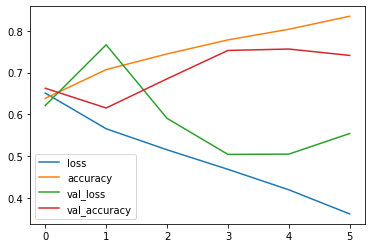

In [106]:
pd.DataFrame(history.history).plot()

In [107]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array


In [145]:
def load_test_image(path):
  image=cv2.imread(path)
  image.resize(32,32,3)
  image_arr=img_to_array(image)
  image_arr=image_arr/255
  np_image = np.expand_dims(image_arr, axis=0)
  return np_image

def pred_dog_cat(img):
  pred=model.predict(img)
  idx=np.argmax(pred)
  if(idx==0):
    print("cat")
  else:
    print("dog")
  



In [146]:
dog=load_test_image("/content/datset/testing/10.jpg")

In [147]:
pred_dog_cat(dog)

cat


In [155]:
ls=[]
test_dir="/content/datset/testing/"

for i in range(1,13):
  path=test_dir+str(i)+".jpg"
  ls.append(load_test_image(path))


len(ls)

12

In [158]:
for i in range(0,12):
  pred_dog_cat(ls[i])

cat
cat
dog
cat
cat
cat
dog
dog
dog
cat
dog
dog
